# Business Understainding
As more AI-powered tools that can produce essays, reports, and other academic content become available, students might be employing these technologies to do their assignments. While in some situations AI can improve learning, when these tools are abused for academic dishonesty, the educational process is compromised. Schools must recognize assignments that were created by AI instead of by students in order to protect academic integrity.

## Problem statement
The school's goal is to create a system that can identify assignments that were probably created using artificial intelligence (AI) tools automatically. The objective is to guarantee that students turn in their own work in order to uphold academic standards.

## Objectives
- Get the model with high recall
- Get a model with high precision
- High accuracy

## Success criteria
- Precision -> above 90%
- Recall -> above 90%
- Accuracy -> above 90%

# Data Understanding
The data consist of four datasets with text of varying word count.
- Part1 -> 20 - 100 Words
- Part2 -> 100 - 200 Words
- Part3 -> 200 - 300 Words
- Part4 -> 300+ Words

The first column of CSV contains the text and the second holds its respective class. The class column contains a binary value.
Here, `0 denotes human-written` and `1 AI-generated text`.

Source of the data is [Github](https://github.com/aakash-dl/HWAI)


In [6]:
import pandas as pd

df_1 = pd.read_csv('Datasets/DatasetPart1.csv')
df_2 = pd.read_csv('Datasets/DatasetPart2.csv')
df_3 = pd.read_csv('Datasets/DatasetPart3.csv')
df_4 = pd.read_csv('Datasets/DatasetPart4.csv')

# merging the dfs

df = pd.concat([df_1, df_2, df_3, df_4])

df

,Text,Class
0,Mississippi Highway 403 and MS 15 in Mathiston...,0
1,State Route 97 northwest of Congress northeast...,0
2,Edwin B. Erickson III was an American politici...,0
3,"The Tiger Fire was a wildfire that burned 16,2...",0
4,"Fajsz , was Grand Prince of the Hungarians fro...",0
...,...,...
9995,"Women in early modern Scotland, between the Re...",0
9996,The Court of Common Pleas was one of the four ...,1
9997,Megara is a fictional character from the Disne...,1
9998,Luan Da is a Chinese literary figure who lived...,1


# EDA

In [2]:
from nltk import FreqDist
from nltk import word_tokenize

In [3]:
# separate the two classes to compare the texts
human_df = df.loc[df['Class'] == 0]
ai_df = df.loc[df.Class == 1]

In [4]:
# tokenize the text
human_df['tokens'] = human_df.Text.apply(word_tokenize)
ai_df['tokens'] = ai_df.Text.apply(word_tokenize)

human_df.head()

C:\Users\mutis\AppData\Local\Temp\ipykernel_26004\2212118046.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  human_df['tokens'] = human_df.Text.apply(word_tokenize)
C:\Users\mutis\AppData\Local\Temp\ipykernel_26004\2212118046.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ai_df['tokens'] = ai_df.Text.apply(word_tokenize)


,Text,Class,tokens
0,Mississippi Highway 403 and MS 15 in Mathiston...,0,"[Mississippi, Highway, 403, and, MS, 15, in, M..."
1,State Route 97 northwest of Congress northeast...,0,"[State, Route, 97, northwest, of, Congress, no..."
2,Edwin B. Erickson III was an American politici...,0,"[Edwin, B., Erickson, III, was, an, American, ..."
3,"The Tiger Fire was a wildfire that burned 16,2...",0,"[The, Tiger, Fire, was, a, wildfire, that, bur..."
4,"Fajsz , was Grand Prince of the Hungarians fro...",0,"[Fajsz, ,, was, Grand, Prince, of, the, Hungar..."


### Words distribution

In [5]:
# counting the words in both dfs
human_words_count = FreqDist(human_df.tokens.explode())
ai_words_count = FreqDist(ai_df.tokens.explode())

In [6]:
# plotting top 10 words for each class
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

def plot_most_common(human_count, ai_count, n=10):
    """Plots the disribution of the most common words
    
    Args:
        human_count: FreqDist object
        ai_count: FreqDist object
    """
    fig, ax = plt.subplots(figsize=(15, 6), ncols=2, nrows=1)

    top_10_human = human_count.most_common(n)
    top_10_ai = ai_count.most_common(n)

    # human text
    sns.barplot(
        x=[obj[0] for obj in top_10_human],
        y=[obj[1] for obj in top_10_human],
        color='skyblue',
        ax=ax[0]
    )

    # ai text
    sns.barplot(
        x=[obj[0] for obj in top_10_ai],
        y=[obj[1] for obj in top_10_ai],
        color='skyblue',
        ax=ax[1]
    )
    
    plt.suptitle(f'Top {n} Words');

c:\Users\mutis\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)
c:\Users\mutis\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


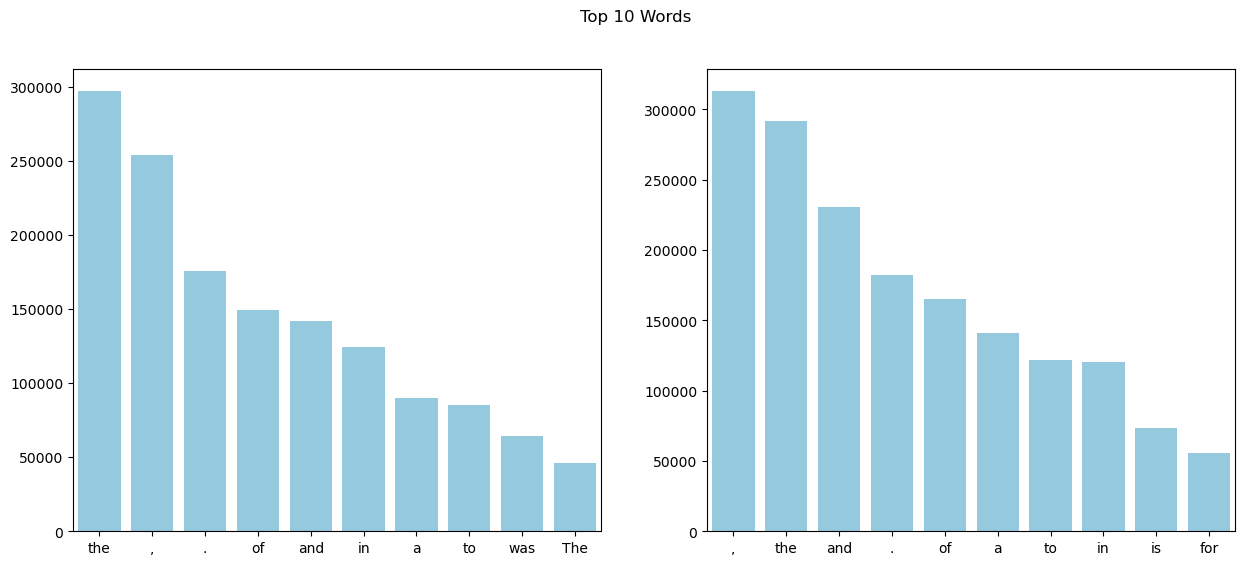

In [7]:
plot_most_common(human_words_count, ai_words_count)

Notice that most common words in both sets are similar stopwords and punctuation.

In [7]:
from sklearn.model_selection import train_test_split
X = df[['Text']]
y = df.Class

# splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y)

# Baseline model with original data

In [5]:
# vectorization
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import cross_val_score

vectorizer = TfidfVectorizer()
vectorized_base_X = vectorizer.fit_transform(X_train['Text'])


In [10]:
# fitting the model
base_model = MultinomialNB()

base_model.fit(vectorized_base_X, y_train)


MultinomialNB()

In [11]:
# validation
baseline_score = cross_val_score(base_model, 
                                 vectorized_base_X,
                                 y_train, cv=2)
print('Baseline model score:', baseline_score.mean())

Baseline model score: 0.8828503471657343


Baseline model records a good score, about 88% accuracy.

## a. Removing Stopwords and punctuation

In [14]:
from nltk.corpus import stopwords
import string

# only english
stopwords = stopwords.words('english')

# adding punctuation

stopwords += list(string.punctuation)
stopwords[-1]

'~'

In [13]:
# remove stopwords
no_stopwords_vectiorizer = TfidfVectorizer(stop_words=stopwords)

no_stopwords_train_X = no_stopwords_vectiorizer.fit_transform(X_train['Text'])

# model
stopwords_model = MultinomialNB()

# crossvalidation
cross_val_score(stopwords_model,
                no_stopwords_train_X,
                y_train, cv=2).mean()

0.8869285155314275

The model accuracy increased slightly after removing stopwords.

## b. Stemming and lemmatization

In [3]:
# !pip install nltk

   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   ------ --------------------------------- 0.3/1.5 MB ? eta -:--:--
   ------------- -------------------------- 0.5/1.5 MB 1.0 MB/s eta 0:00:01
   -------------------- ------------------- 0.8/1.5 MB 1.1 MB/s eta 0:00:01
   --------------------------- ------------ 1.0/1.5 MB 1.1 MB/s eta 0:00:01
   ---------------------------------- ----- 1.3/1.5 MB 1.1 MB/s eta 0:00:01
   ---------------------------------------- 1.5/1.5 MB 1.1 MB/s eta 0:00:00


In [4]:
import nltk
from nltk.stem import PorterStemmer
nltk.download('wordnet')
from nltk.stem.wordnet import WordNetLemmatizer
from nltk import word_tokenize

stemmer = PorterStemmer()
wnl = WordNetLemmatizer()

X_train_b = X_train.copy()

# function to stem and lemmatize words
def stem_lemmatize(text):
    tokens = word_tokenize(text)
    # stemming
    tokens = [stemmer.stem(x) for x in tokens]
    # lemmatize
    tokens = [wnl.lemmatize(x) for x in tokens]
    
    # join back to text
    new_text = " ".join(tokens)
    
    return new_text

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\mutis\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [15]:
# stem and lemmatize X train
X_train_b['Text'] = X_train_b.Text.apply(stem_lemmatize)

In [16]:
b_model = MultinomialNB()

# vectorization
b_vectorized_X = no_stopwords_vectiorizer.fit_transform(X_train_b['Text'])

In [17]:
# validation
cross_val_score(b_model, b_vectorized_X,
                y_train, cv=2).mean()

0.8698606152946008

Stemming and lemmatization leads to lower accuracy.

## c. Adding POS tags

This can add more info eg(when word is used as a noun or a verb)


In [47]:
from nltk import pos_tag
X_train_c = X_train.copy()

# function to add POS tags
def add_pos(text):
    """Adds POS tags to the text
    Args: 
        text: str
    Returns:
        str: text with POS tags
    """
    # tokenization
    tokens = word_tokenize(text)
    # obtain tags
    pos_tags = pos_tag(tokens)
    tags = [x[1] for x in pos_tags]
    
    # add tags
    pos_added_tokens = ['_'.join(item) for item in list(zip(tokens, tags))]
    
    # join to single string
    pos_text = ' '.join(pos_added_tokens)
    
    return pos_text

In [48]:
# applying function to X_train
X_train_c['processed_text'] = X_train.Text.apply(add_pos)
X_train_c.head()

,Text,processed_text
904,"In 2010, two powerful earthquakes struck near ...","In_IN 2010_CD ,_, two_CD powerful_JJ earthquak..."
428,"In ""Homer vs. the Eighteenth Amendment,"" an ep...",In_IN ``_`` Homer_NNP vs._IN the_DT Eighteenth...
2752,The Flag of Scotland is a distinctive symbol o...,The_DT Flag_NNP of_IN Scotland_NNP is_VBZ a_DT...
10043,Colin Doyle is a professional footballer who p...,Colin_NNP Doyle_NNP is_VBZ a_DT professional_J...
202,"""Hooks Island"" is a captivating mystery book t...",``_`` Hooks_NNP Island_NNP ''_'' is_VBZ a_DT c...


In [49]:
c_model = MultinomialNB()

final_vectorizer = TfidfVectorizer(stop_words=stopwords)
# vectorization
c_processed_X = final_vectorizer.fit_transform(X_train_c['processed_text'])

In [21]:
# validation
cross_val_score(c_model,
                c_processed_X,
                y_train,
                cv=2).mean()

0.8860525012411656

We can see some improvement after adding the tags.

From all the preprocessing steps the effective ones are:
1. `Removing stopwords and punctuation.`
2. `Adding POS tags`

In [22]:
final_X_train = c_processed_X

In [23]:
# processing test data
# remove stopwards, punctuation and adding pos tags
X_test['processed_text'] = X_test.Text.apply(add_pos)

# vectorizing
X_test_preprocessed = final_vectorizer.transform(X_test['processed_text'])

# Fitting other models

## 1. Logistic Regression

In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score,
    recall_score,
    precision_score
)
# model
logreg = LogisticRegression(solver='liblinear')

# fitting
logreg.fit(final_X_train, y_train)

preds = logreg.predict(X_test_preprocessed)

# evaluation
print('Logistic Regression Accuracy:', accuracy_score(y_test, preds))
print('Logistic Regression Recall:', recall_score(y_test, preds))
print('Logistic Regression Precision:', precision_score(y_test, preds))

Logistic Regression Accuracy: 0.9652016311735387
Logistic Regression Recall: 0.9560499186109603
Logistic Regression Precision: 0.9740187949143173


## 2. Random Forest

In [25]:
from sklearn.ensemble import RandomForestClassifier

# model
rf = RandomForestClassifier()

# fitting
rf.fit(final_X_train, y_train)

preds_rf = rf.predict(X_test_preprocessed)

# evaluation
print('Random Forest Accuracy:', accuracy_score(y_test, preds_rf))
print('Random Forest Recall:', recall_score(y_test, preds_rf))
print('Random Forest Precision:', precision_score(y_test, preds_rf))

Random Forest Accuracy: 0.953330312641595
Random Forest Recall: 0.9522517634291915
Random Forest Precision: 0.9544960116026106


## 3. XGBoost

In [26]:
# !pip install xgboost

In [27]:
from xgboost import XGBClassifier


# model
xgb = XGBClassifier()

# fitting
xgb.fit(final_X_train, y_train)

preds_xgb = xgb.predict(X_test_preprocessed)

# evaluation
print('XGBoost Accuracy:', accuracy_score(y_test, preds_xgb))
print('XGBoost Recall:', recall_score(y_test, preds_xgb))
print('XGBoost Precision:', precision_score(y_test, preds_xgb))

XGBoost Accuracy: 0.9570457634798368
XGBoost Recall: 0.9489962018448183
XGBoost Precision: 0.9646993932708219


## 4. Logistic regression as a neural network

In [57]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense


# Build the Logistic Regression model using Keras
model = Sequential()
 # Logistic regression with 1 neuron and sigmoid activation
model.add(Dense(1, activation='sigmoid')) 

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(final_X_train, y_train, epochs=30, batch_size=10)

# Make predictions
predictions = model.predict(X_test_preprocessed)
# Apply 0.5 threshold
predicted_classes = np.where(predictions > 0.5, 1, 0)  


# evaluation
print('Keras Accuracy:', accuracy_score(y_test, predicted_classes))
print('Keras Recall:', recall_score(y_test, predicted_classes))
print('Keras Precision:', precision_score(y_test, predicted_classes))

This is the model with the best performance.

# Refactoring to pipeline

In [8]:
# !pip install scikeras

In [52]:
# creating the  keras model as an sklearn model
from scikeras.wrappers import KerasClassifier
from keras import Input

def create_keras_model():
    model = Sequential()
    model.add(Input(sparse=True))
    # Logistic regression with 1 neuron and sigmoid activation
    model.add(Dense(1, activation='sigmoid', sparse=True)) 

    # Compile the model
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

keras_model = KerasClassifier(build_fn=create_keras_model)

In [34]:
# new pos tag function
def add_pos_tags(text_list):
    """Adds POS tags to each text in the list
    Args: 
        text_list: [str]
    Returns:
        [str]: list of text with POS tags
    """
    new_list = [add_pos(x) for x in text_list]
    
    return new_list

In [35]:
# change add_pos function to sklearn object
from sklearn.preprocessing import FunctionTransformer
AddPosTags = FunctionTransformer(add_pos_tags)

In [40]:
ps_tagged = AddPosTags.fit_transform(X_train['Text'])

In [54]:
# keras_model.fit(vectorizer.fit_transform(ps_tagged), y_train)

In [36]:
# Creating the pipeline
from sklearn.pipeline import Pipeline

pipeline = Pipeline([
    ('postags', AddPosTags),
    ('vectorizer', TfidfVectorizer(stop_words=stopwords)),
    ('model', keras_model)
])

In [55]:
# fitting final model 
# pipeline.fit(X_train['Text'], y_train)

## Saving model and preprocessing steps for deployment

In [30]:
# save the vectorizer
import joblib
with open('pipeline.pkl', 'wb') as file:
    joblib.dump(pipeline, file)